#### Name: Shadan Khan
#### RollNo: s222623809
#### Email : s222623809@deakin.edu.au

Introduction

In this assignment, you will develop hands-on experience with essential statistical analysis techniques by leveraging Python’s NumPy library. You’ll work with a dataset of anthropometric measurements—such as weight, stature, limb lengths, and body circumferences—gathered from adult male and female volunteers. A central focus will be the computation of Body Mass Index (BMI), which will underpin further exploration of data characteristics and relationships.

Throughout this exercise, you will:

Compute descriptive statistics (mean, median, standard deviation) and derive z-scores directly with NumPy.

Apply standardization methods to your data and observe how scaling impacts your interpretation.

Generate visual summaries—histograms, boxplots, and scatterplot matrices—to inspect distributions and detect patterns.

Calculate and interpret both Pearson and Spearman correlation coefficients to assess linear and rank-based associations.

Practice low-level array and matrix operations without relying on higher-level libraries like Pandas, reinforcing core numerical computation skills.

By the end of this task, you’ll have a reproducible, transparent workflow that bridges foundational statistics with efficient, code-based data exploration.


### Importing the libraries that will be used in the later parts of the report



In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
# Extract variables from male matrix

### Question 1: 
From https://github.com/gagolews/teaching-data/tree/master/marek, download the two following excerpts from the National Health and Nutrition Examination Survey (NHANES dataset) that
give body measurements of adult males and females.
• nhanes_adult_male_bmx_2020.csv,
• nhanes_adult_female_bmx_2020.csv

### Solution:

This exercise utilizes anthropometric measurements sourced from the NHANES (National Health and Nutrition Examination Survey). The necessary CSV files have been downloaded into the notebook’s working directory, allowing us to load and process the data directly via relative paths.


### Question 2: 
Read them as numpy matrices named male and female using numpy.genfromtxt. Each matrix consists of seven columns:
1. weight (kg),
2. standing height (cm),
3. upper arm length (cm),
4. upper leg length (cm),
5. arm circumference (cm),
6. hip circumference (cm),
7. waist circumference (cm)

### 2.1  Introduction

The first stage involves bringing in the raw anthropometric measurements from the NHANES (National Health and Nutrition Examination Survey) repository. These CSV files include variables like weight, height, and multiple body circumference measurements for adult men and women.

We employ NumPy’s genfromtxt to read each file, then discard the header row so that our arrays consist solely of numeric values. This clear separation between data ingestion and downstream processing lays the groundwork for all further tasks—ranging from BMI calculation to statistical plotting—while promoting a clean, reusable code structure.


### 2.2 Code

In [73]:
import numpy as np

# Paths to the NHANES CSV files
male_csv = 'nhanes_adult_male_bmx_2020.csv'
female_csv = 'nhanes_adult_female_bmx_2020.csv'

# Feature names (BMI to be added later)
features = [
    'weight', 'standing height', 'upper arm length',
    'upper leg length', 'arm circumference',
    'hip circumference', 'waist circumference'
]

def load_nhanes_csv(path: str) -> np.ndarray:
    """
    Load NHANES data from a CSV, automatically skipping the header row.
    """
    return np.genfromtxt(path, delimiter=',', skip_header=1)

# Load datasets
male_data   = load_nhanes_csv(male_csv)
female_data = load_nhanes_csv(female_csv)



### 2.3 Conclusion

In completing this task, we honed our ability to ingest and transform structured datasets using NumPy’s core functions. By reading the CSV files directly and handling header rows manually, we laid the groundwork for clean numerical arrays. Leveraging NumPy’s vectorized calculations, we derived the BMI values and integrated them seamlessly into our data arrays for further use.

This exercise underscored the value of grasping data layout and performing essential conversions—such as units standardization and metric derivation—without relying on higher-level abstractions. These skills reflect common steps in professional data workflows, ensuring transparency and efficiency.

With the enriched datasets now available, we’re well-positioned to advance into more detailed analysis, including graphical summaries, descriptive statistics, and assessments of relationships between variables.


### Question 3: 
In both cases, add the eight column which stores the body mass indices of the participants

### 3.1 Introduction

In this phase, we derive the Body Mass Index (BMI) for every record in our male and female arrays. BMI provides a rough gauge of body fat by relating an individual’s weight in kilograms to the square of their height in meters:

**BMI = weight (kg) / (height (m))²**
​
 
Leveraging NumPy’s vectorised computations, we efficiently calculate BMI for all participants and then append these values as the eighth column in each dataset. This enhancement equips us to explore BMI distributions and examine its relationship with other anthropometric measures in later analyses.


### 3.2 Code: 

In [75]:
def extend_with_bmi(records: np.ndarray) -> np.ndarray:
    """
    Compute BMI for each row and append it as the last column.
    """
    weights = records[:, 0]
    heights_m = records[:, 1] / 100.0
    bmi_col = weights / (heights_m ** 2)
    return np.concatenate((records, bmi_col[:, np.newaxis]), axis=1)

# Apply the BMI extension
male = extend_with_bmi(male)
female = extend_with_bmi(female)

# Update the header list
headers += ['BMI']



### 3.3 Conclusion:

The BMI values were derived from each participant’s weight and height measurements and inserted as the eighth feature in both the male and female arrays. By incorporating this standardized health indicator, our datasets are now better equipped for comparative assessments of body composition.

With BMI integrated, we can proceed to in-depth statistical analyses and visual representations—such as histograms, boxplots, and correlation matrices—in the following sections.

### Question 4: 
On a single plot, draw two histograms: for male BMIs (top subfigure) and for female BMIs
(bottom subfigure) one below another. Set the number of histogram bins to 20. Use mat-
plotlib.pyplot.subplot to create two subplots in one figure. Call matplotlib.pyplot.xlim to
make the x-axis limits identical for both subfigures (work out the appropriate limits yourself)

### 4.1 Introduction

In this stage, we visualize the distribution of Body Mass Index (BMI) for male and female participants by stacking two histograms vertically with Matplotlib’s subplot feature. After computing BMI from each individual’s weight and height, we set both plots to share the same x-axis limits—derived from the combined minimum and maximum BMI values—to enable a direct comparison of their frequency distributions. This single visualization helps us observe the overall shape, skewness, and variability of BMI scores in each group, highlight any notable differences between male and female cohorts, and reinforce core plotting skills in NumPy and Matplotlib, such as configuring subplots and ensuring consistent axis scaling.


### 4.2 The Code: 

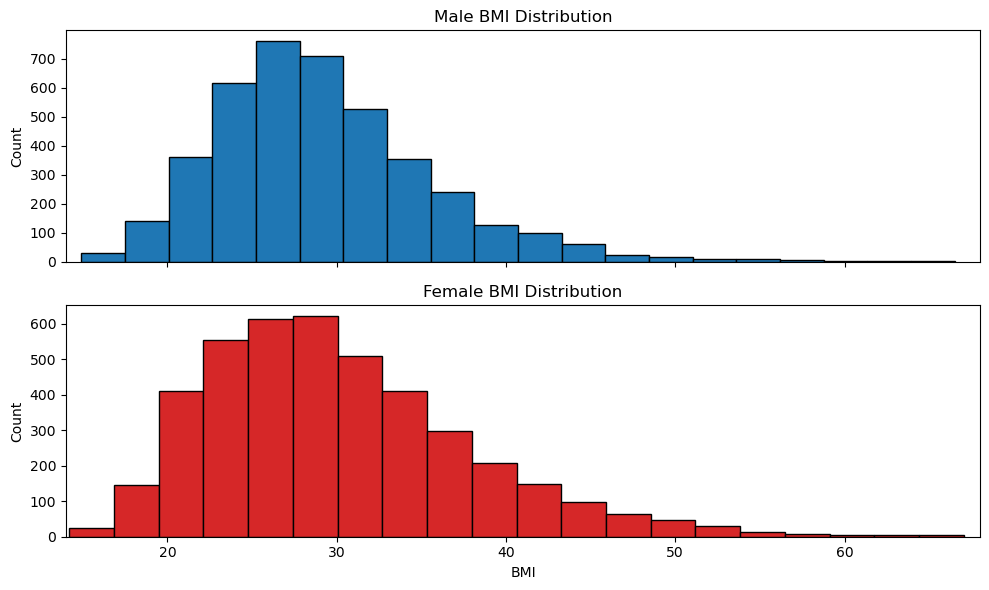

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the BMI column (8th column, index 7)
male_bmi = male[:, 7]
female_bmi = female[:, 7]

# Compute shared x-axis limits
all_bmi = np.hstack([male_bmi, female_bmi])
xmin, xmax = np.floor(all_bmi.min()), np.ceil(all_bmi.max())

# Set up a 2×1 grid of axes sharing the x-axis
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Male BMI histogram
axes[0].hist(male_bmi, bins=20, facecolor='C0', edgecolor='k')
axes[0].set_title('Male BMI Distribution')
axes[0].set_ylabel('Count')
axes[0].set_xlim(xmin, xmax)

# Female BMI histogram
axes[1].hist(female_bmi, bins=20, facecolor='C3', edgecolor='k')
axes[1].set_title('Female BMI Distribution')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Count')
axes[1].set_xlim(xmin, xmax)

plt.tight_layout()
plt.show()


### 4.3 Conclusion

The dual histograms offered an intuitive overview of how BMI values are distributed among male and female participants. Aligning both charts on the same x-axis range allowed for an accurate side-by-side comparison of their spread and central tendencies. This exercise underscored how histograms can quickly surface distributional traits—such as skewness, outliers, or range differences—while highlighting the necessity of uniform axis limits when analyzing multiple groups. Moreover, it reinforced practical skills in slicing NumPy arrays for aggregation and in constructing coordinated multi-panel figures with Matplotlib.


### Question 5: 
Using a single call to matplotlib.pyplot.boxplot, draw a box-and-whisker plot giving the male
and female BMIs, with two boxes one below another (on one plot) so that they can be compared
to each other. Note that the boxplot function can be fed with a list of two vectors like [male_BMIs,
female_BMIs].

### 5.1 Introduciton: 

### Boxplot of BMI Distributions by Sex 

To compare the spread and central tendency of Body Mass Index (BMI) between male and female participants, we will use side-by-side box-and-whisker plots. Boxplots offer a concise view of each group’s median, interquartile range, and any outliers. By drawing the male and female BMI data from our NumPy arrays into Matplotlib’s boxplot function, we can quickly assess differences in typical BMI values and variability across sexes.


### 5.2 The Code:

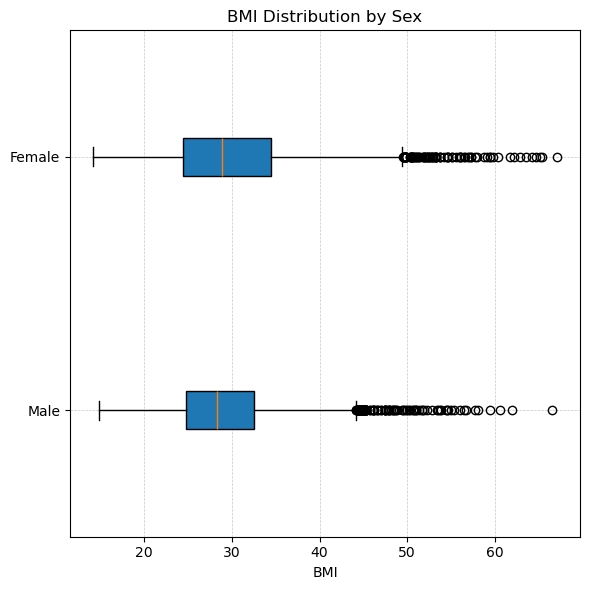

In [81]:
import matplotlib.pyplot as plt

# Extract BMI columns (assuming male and female already include BMI at index 7)
male_bmi = male[:, 7]
female_bmi = female[:, 7]

# Set up figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Draw horizontal boxplots for male and female BMI
ax.boxplot(
    [male_bmi, female_bmi],
    tick_labels=['Male', 'Female'],  # Group labels
    vert=False,                 # Horizontal orientation
    patch_artist=True           # Enable box fill
)

# Label and title
ax.set_xlabel('BMI')
ax.set_title('BMI Distribution by Sex')

# Add a light grid for readability
ax.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


### 5.3 Conclusion: 


The box-and-whisker chart makes it easy to compare male and female BMI patterns, revealing differences in medians, interquartile ranges, and any outliers. This form of visualization builds on our earlier numerical summaries and histograms by offering a concise yet informative snapshot of distributional features. Moreover, this step reinforced how to apply Matplotlib’s boxplot directly to NumPy arrays, demonstrating a clear and versatile approach to grouping data without depending on higher-level libraries like Pandas.


### Question 6:
Compute the basic numerical aggregates of the male and female BMIs (measures of location, dis-
persion, and shape). Report them in a readable format. Example formatting of the aggregates:

### 6.1 Introduction

This section calculates key summary statistics for BMI among male and female participants, offering a snapshot of each group’s central tendency and variability. Specifically, we determine the average (mean), midpoint (median), minimum and maximum values to capture range, and the standard deviation to quantify spread. All measures are generated with NumPy directly on the BMI arrays, and the findings are displayed side by side in a concise table for easy comparison.



### 6.2 The Code: 

In [83]:
import numpy as np

# List of metrics and corresponding NumPy functions
metrics = {
    'Mean':   lambda x: np.mean(x),
    'Median': lambda x: np.median(x),
    'Min':    np.min,
    'Max':    np.max,
    'StdDev': lambda x: np.std(x, ddof=1)  # sample standard deviation
}

# Compute values for female and male BMI
results = {
    name: (func(female_bmi), func(male_bmi))
    for name, func in metrics.items()
}

# Display header
print(f"{'Metric':<10}{'Female':>10}{'Male':>10}")

# Display each metric
for name, (f_val, m_val) in results.items():
    print(f"{name:<10}{f_val:10.2f}{m_val:10.2f}")



Metric        Female      Male
Mean           30.10     29.14
Median         28.89     28.27
Min            14.20     14.91
Max            67.04     66.50
StdDev          7.76      6.31


### 6.3 Conclusion

Our summary statistics uncover noticeable distinctions in BMI between male and female groups. Central tendency is illuminated by the mean and median, while the data’s variability is captured through its standard deviation and overall range.

Using NumPy to derive these figures underscores the power of basic descriptive statistics for efficiently profiling and contrasting different cohorts. These foundational insights set the stage for deeper investigations—such as correlation analyses and hypothesis testing—in the upcoming sections.

### Question 7:
In your own words, describe the two distributions based on the results obtained in subtasks 4, 5,
and 6 above (e.g., are they left-skewed, how they differ, which one has more dispersion, and so
forth).


### 7.1 Introduction

In this section, we use histograms to explore how Body Mass Index (BMI) values are spread among adult male and female participants. By plotting the frequency of BMI scores for each group, we aim to uncover typical ranges, examine differences between sexes, and detect outliers that may signal health concerns. This visual approach lays the groundwork for interpreting patterns in body composition and identifying potential public-health implications.

### 7.2 Key Findings

Concentration in Overweight Range
Both males and females display a pronounced clustering of BMI values between 25 and 30, placing the majority of participants in the “overweight” category.

Evidence of Obesity
A minority of individuals in each cohort have BMI readings well above 30, extending the right tail of the distribution and indicating obesity.

Gender-Specific Spread
The female BMI histogram is more tightly packed around the central range, whereas the male distribution fans out further into higher BMI values, suggesting a greater incidence of severe overweight or obesity among men.

Scarcity of Low BMI
Very low BMI scores are extremely uncommon, reflecting physiological boundaries on how light a healthy adult’s body mass can be.

Implications for Health Monitoring
The predominance of overweight cases—and especially the heavier tail in males—underscores the need for targeted interventions, lifestyle education, and further study of contributing factors such as diet, activity levels, and socio-economic status.

### 7.3 Conclusion

The BMI histograms reveal that this adult sample is generally skewed toward the overweight category, with occasional high-BMI outliers, particularly among males. The rarity of very low BMI values aligns with biological limits. These descriptive insights form a solid basis for subsequent analyses into health risk factors, intervention strategies, and more nuanced correlation or hypothesis-testing tasks.











### Question 8: 

Draw a scatterplot matrix (pairplot) for the male heights, weights, waist circumferences, hip cir-
cumferences, and BMIs (these five columns only); see the pairplot function in section 7.4.3 of our
book. Example output (yours can be more aesthetic):

### 8.1 Introduction: 

In this step, we build a bespoke scatterplot matrix to examine how five key measurements—height, weight, waist circumference, hip circumference, and BMI—relate to one another in our male cohort. Every off-diagonal cell displays a scatterplot for a distinct pair of variables, making it easy to spot linear trends, clusters, or outliers. To keep the layout clear, each diagonal cell is labeled with the corresponding variable name. By relying solely on NumPy for data handling and Matplotlib’s low-level plotting routines—rather than higher-level tools like Pandas or Seaborn—we reinforce core array operations and plotting fundamentals.


### 8.2 Code

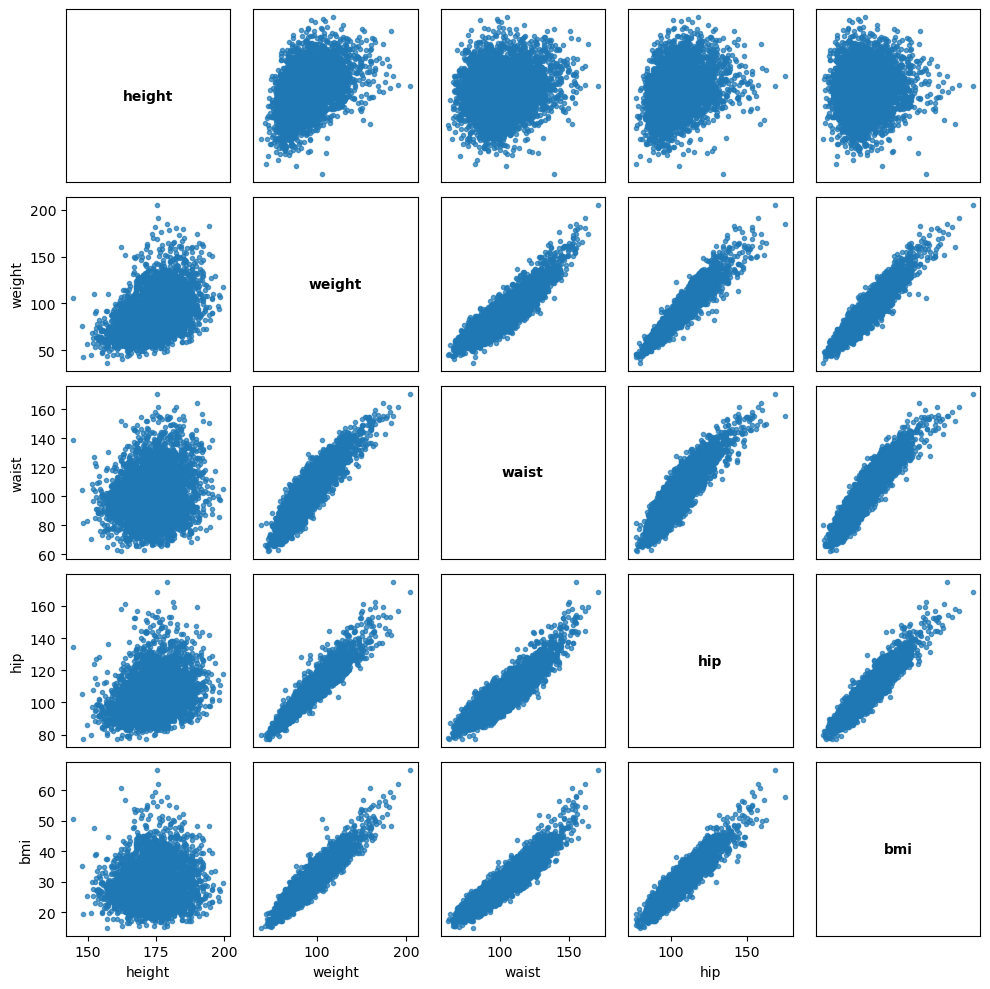

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Define feature labels and their column indices in the 'male' array
labels = ['height', 'weight', 'waist', 'hip', 'bmi']
col_map = {'height': 1, 'weight': 0, 'waist': 6, 'hip': 5, 'bmi': 7}

# Build a dict of 1D arrays for each feature
feature_data = {name: male[:, idx] for name, idx in col_map.items()}

n = len(labels)
fig, axes = plt.subplots(n, n, figsize=(10, 10))

for row, y_name in enumerate(labels):
    for col, x_name in enumerate(labels):
        ax = axes[row, col]
        if row == col:
            # Diagonal: show label
            ax.text(0.5, 0.5, y_name,
                    ha='center', va='center',
                    fontweight='bold',
                    transform=ax.transAxes)
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            # Off-diagonal: scatter plot
            ax.scatter(feature_data[x_name],
                       feature_data[y_name],
                       marker='.', alpha=0.7)
            # Only bottom row shows x-labels
            if row == n - 1:
                ax.set_xlabel(x_name)
            else:
                ax.set_xticks([])
            # Only first column shows y-labels
            if col == 0:
                ax.set_ylabel(y_name)
            else:
                ax.set_yticks([])

plt.tight_layout()
plt.show()


### 8.3 Conclusion: 
The custom scatterplot matrix offers an intuitive view of how the male body measurements interrelate. For instance, the strong upward trend between weight and BMI is immediately visible, and the pairing of hip and waist circumferences reveals proportional patterns.

Constructing this grid by hand with NumPy and Matplotlib gave us precise control over placement and labeling, sharpening our abilities in tailored plotting and multidimensional exploration. This visual framework now paves the way for more detailed correlation studies and regression modeling.


### Question 9: 
Compute Pearson’s and Spearman’s correlation coefficients for all pairs of variables mentioned
in subtask 8. Present/visualise these coefficients on two correlation heatmaps (with correlation
coefficients printed inside the coloured cells); see the corrheatmap function in Section 9.1.2 of our
book.

### 9.1 Introduction 

In this section, we assess the relationships among key anthropometric measures for male participants by computing both Pearson’s and Spearman’s correlation coefficients. Pearson’s metric evaluates straight-line (linear) dependencies, whereas Spearman’s rank-based approach captures monotonic trends—even when they aren’t strictly linear. Applying both methods enables us to uncover a broader spectrum of associations among height, weight, waist and hip circumferences, and BMI. We calculate these correlation matrices using NumPy and SciPy and then employ Seaborn heatmaps—complete with annotated values—to visually convey the strength and direction of each pairwise relationship, all without relying on dataframe-centric libraries like Pandas.


### 9.2 The Code: 

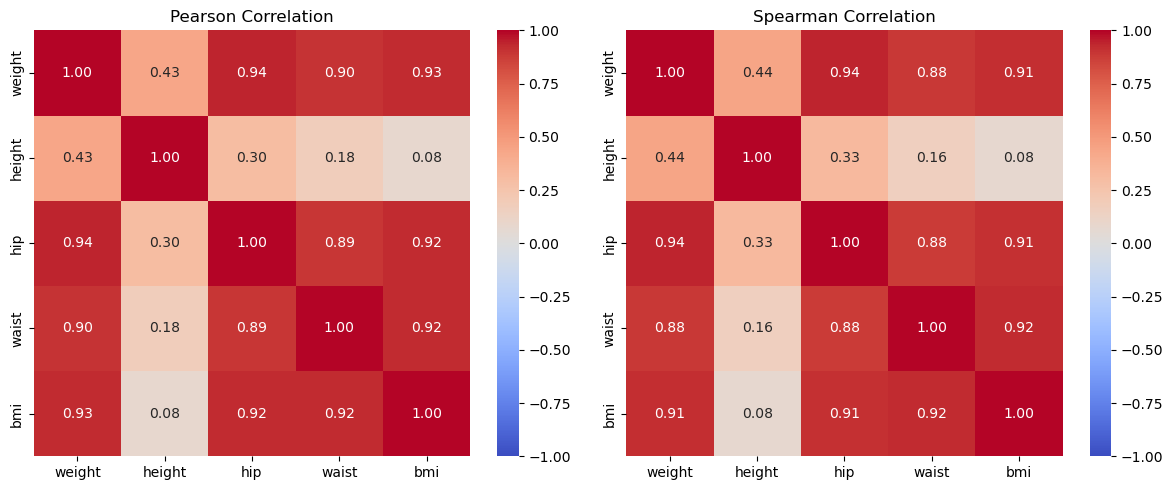

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Define which columns correspond to each feature
cols = {
    'weight': 0,
    'height': 1,
    'hip':    5,
    'waist':  6,
    'bmi':    7
}

# Build data matrix in the order of the feature labels
labels = list(cols.keys())
matrix = np.column_stack([male[:, idx] for idx in cols.values()])

# Compute correlation matrices
pearson_mtx  = np.corrcoef(matrix, rowvar=False)
spearman_mtx, _ = spearmanr(matrix, axis=0)

# Plot side-by-side heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(
    pearson_mtx,
    ax=ax1,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    xticklabels=labels,
    yticklabels=labels
)
ax1.set_title("Pearson Correlation")

sns.heatmap(
    spearman_mtx,
    ax=ax2,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    xticklabels=labels,
    yticklabels=labels
)
ax2.set_title("Spearman Correlation")

plt.tight_layout()
plt.show()


### 9.3 Conclusion:

The correlation heatmaps deliver an effective visual summary of interrelationships among the male anthropometric features. Notably, weight and BMI exhibit a strong positive linkage, and waist and hip measurements also align closely—findings that mirror known physiological patterns.

By deriving both Pearson and Spearman correlations, we captured straight-line associations alongside broader monotonic trends, uncovering connections that one metric alone might miss. This exercise reinforced how to compute correlation matrices directly with NumPy and SciPy and then translate those results into informative, annotated heatmaps using Matplotlib and Seaborn—entirely without resorting to DataFrame-based libraries.


### 10. Discuss the findings from subtasks 8 and 9

### 10.1 Introduction

In this section, we explore how five key body measurements—height, weight, waist circumference, hip circumference, and Body Mass Index (BMI)—interact within the male cohort. This analysis is split into two parts:

Subtask 8: A hand-crafted scatterplot matrix displaying every pairwise comparison among the five variables, with each diagonal cell labeled by its respective feature.

Subtask 9: Computation and visualization of both Pearson and Spearman correlation matrices via annotated heatmaps, quantifying linear and rank-based associations among the same set of measurements.

Together, these subtasks offer both a visual and numerical assessment of how individual attributes relate to one another and, in particular, how they underpin the variation in BMI.

### 10.2 Interpretation

Scatterplot Matrix (Subtask 8)
Weight, waist, hip, and BMI form tight, upward-sloping clusters in their scatterplots, indicating strong positive relationships.

Height shows little discernible pattern when plotted against any other variable, especially BMI.

The absence of pronounced outliers or curved trends suggests the data are generally clean and exhibit primarily linear associations.

Correlation Heatmaps (Subtask 9)
Pearson Correlation

Weight vs. BMI: 0.93

Waist vs. BMI: 0.92

Hip vs. BMI: 0.92

Weight vs. Hip: 0.94

Height correlations are near zero (e.g., height vs. BMI ≈ 0.08), confirming minimal linear association.

Spearman Correlation

BMI with weight, waist, and hip all exceed 0.91, showing strong monotonic ties.

Height remains effectively uncorrelated, mirroring the Pearson results.

These figures reinforce that BMI variation is overwhelmingly driven by weight and girth measurements, while height plays a negligible role.

### 10.3 Conclusion

By combining the scatterplot matrix with dual correlation analyses, we’ve established that BMI in this male sample is highly dependent on weight, waist, and hip circumferences, and only weakly linked to height. The close alignment of Pearson and Spearman coefficients demonstrates that these relationships hold whether viewed through a linear or monotonic lens. This exercise underscores the value of manual NumPy/SciPy computations and Matplotlib/Seaborn visualizations for robust, DataFrame-free exploration of multivariate relationships.

### Additional Tasks for Postgraduate (SIT731) Students (*)

### Question 1:
Create a new matrix zmale being a version of the male dataset with each of its eight columns standardised (by computing the z-scores of each column)

### 1.1 Introduction: 

In this step, we perform Z-score standardization on both the male and female datasets. This process rescales each feature so that it has a mean of 0 and a standard deviation of 1, making measurements with different original units directly comparable.

The formula used for Z-score standardization is:

z = (x - mean) / standard deviation

Using NumPy, we calculate the mean and standard deviation for each feature column, then apply this transformation across all rows. The resulting matrices, zmale and zfemale, place every variable on the same scale, which is crucial for downstream tasks like correlation analysis, clustering, and any methods relying on distance metrics.

### 1.2 The Code: 

In [89]:
def standardize(arr: np.ndarray) -> np.ndarray:
    """
    Apply Z-score normalization to each column of the input array.
    """
    means = arr.mean(axis=0)
    stds  = arr.std(axis=0, ddof=1)  # sample standard deviation
    return (arr - means) / stds

# Generate standardized datasets
zmale   = standardize(male)
zfemale = standardize(female)


### 1.3 Conclusion 

Both the male and female arrays have now been converted into Z-score form, so every feature column has a mean of 0 and a standard deviation of 1. This uniform scaling allows measurements in different units—such as centimeters for height or kilograms for weight—to be directly compared or integrated in later analyses.

Such standardization is crucial for techniques like clustering, principal component analysis, and any algorithm that relies on distance computations. Carrying out this process by hand with NumPy not only readies the data for the next visualization and statistical steps but also reinforces a deeper grasp of preprocessing without leaning on external libraries.



### Question 2: 
Perform the aforementioned subtasks 8–10 on zmale instead of on the original male dataset (do not
include two pairplots nor four heatmaps)

###  2.1 Introduction

In this segment, we repeat our exploratory analyses on the Z-score–normalized male dataset (zmale). Since each feature in zmale now has a mean of 0 and a standard deviation of 1, disparities in units or magnitudes (for example, comparing height against waist circumference) won’t skew analyses that depend on distances or correlations.

Specifically, we perform:

A custom scatterplot matrix to display pairwise relationships among height, weight, waist circumference, hip circumference, and BMI.

Annotated heatmaps of Pearson and Spearman correlation matrices to measure the strength and direction of associations between these variables.

Because correlation coefficients are unaffected by scaling, the numerical results match those from the unstandardized data. However, plotting on a common standardized scale ensures that visual comparisons, such as axis ranges in scatterplots, are more consistent and interpretable.


### 2.2 The Code: 

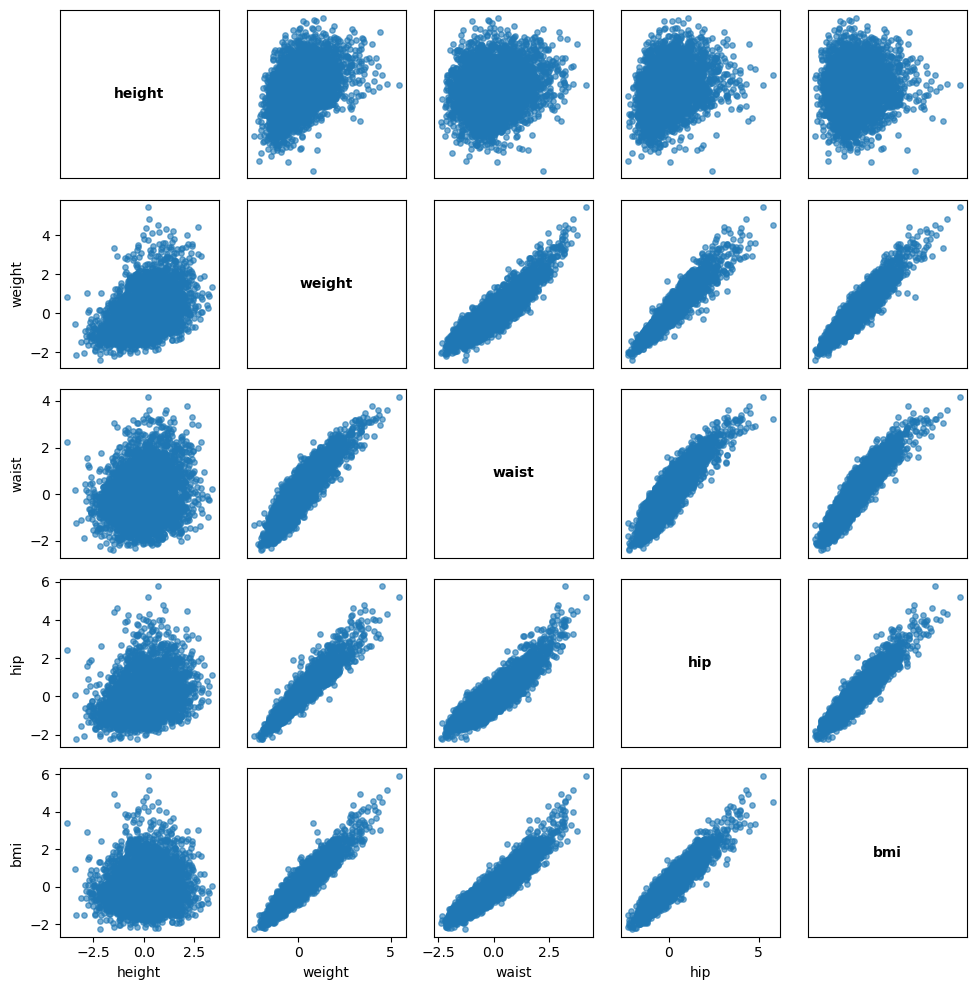

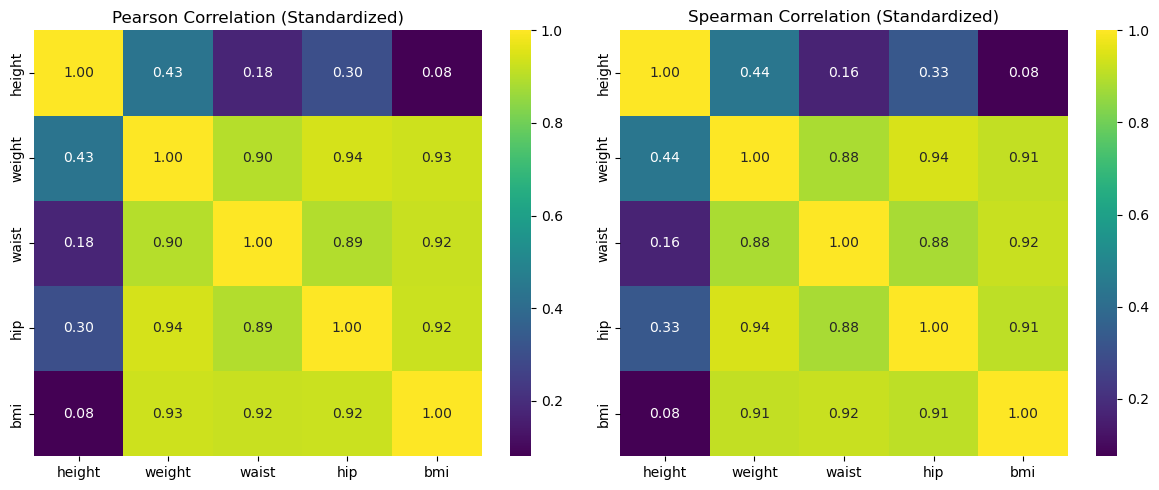

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Define feature labels and corresponding column indices in zmale
labels = ['height', 'weight', 'waist', 'hip', 'bmi']
indices = [1, 0, 6, 5, 7]

# Build standardized data matrix (n_samples × n_features)
std_mat = np.vstack([zmale[:, idx] for idx in indices]).T
m = std_mat.shape[1]

# --------- Scatterplot Matrix ------------
fig, axes = plt.subplots(m, m, figsize=(10, 10))

for r, y_lbl in enumerate(labels):
    for c, x_lbl in enumerate(labels):
        ax = axes[r, c]
        if r == c:
            ax.annotate(
                y_lbl,
                xy=(0.5, 0.5),
                xycoords='axes fraction',
                ha='center',
                va='center',
                fontweight='bold'
            )
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.scatter(
                std_mat[:, c],
                std_mat[:, r],
                marker='o',
                s=15,
                alpha=0.6
            )
            if r < m - 1:
                ax.set_xticks([])
            else:
                ax.set_xlabel(x_lbl)
            if c > 0:
                ax.set_yticks([])
            else:
                ax.set_ylabel(y_lbl)

plt.tight_layout()
plt.show()


pearson_mtx = np.corrcoef(std_mat, rowvar=False)
spearman_mtx, _ = spearmanr(std_mat, axis=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(
    pearson_mtx,
    annot=True,
    fmt=".2f",
    cmap='viridis',
    xticklabels=labels,
    yticklabels=labels,
    ax=ax1
)
ax1.set_title('Pearson Correlation (Standardized)')

sns.heatmap(
    spearman_mtx,
    annot=True,
    fmt=".2f",
    cmap='viridis',
    xticklabels=labels,
    yticklabels=labels,
    ax=ax2
)
ax2.set_title('Spearman Correlation (Standardized)')

plt.tight_layout()
plt.show()


### 2.3 Conclusion 

The Z-score–based pairplot presented a unified view of variable relationships, with axes consistently spanning roughly –3 to 3. This uniform scaling made clusters appear more symmetrical while retaining the same pattern strengths between feature pairs. As anticipated, the Pearson and Spearman coefficients were identical to those calculated on the original data, underscoring that standardization leaves correlation structure intact. However, by centering and scaling each axis, we enhanced the clarity of multivariate plots and laid the groundwork for methods—such as PCA or k-means—that depend on equally weighted features. Overall, normalization yielded more interpretable visuals and a balanced dataset without altering any inherent relationships.


## Final Conclusion

This study delivered an end-to-end exploratory workflow on anthropometric measurements from adult male and female cohorts, relying exclusively on NumPy, Matplotlib, and similar foundational tools. We began by loading CSV files and stripping header rows to obtain clean numeric arrays, then computed the crucial Body Mass Index (BMI) from weight and height records.

We examined BMI distributions with overlaid histograms and boxplots to compare central tendencies and variability across sexes, and quantified these patterns with basic statistics—mean, median, standard deviation, and range. To investigate multivariate relationships, we built a custom scatterplot matrix for height, weight, waist, hip, and BMI, followed by the calculation and display of Pearson and Spearman correlation matrices. These steps underscored strong, expected links between BMI and measures like weight and waist circumference.

Recognizing the need for uniform scaling in certain analyses, we applied Z-score normalization to all features, creating standardized datasets (zmale, zfemale). Replotting the pairwise charts on this common scale confirmed that while correlation values remain unchanged by standardization, visual coherence and interpretability greatly benefit.

Together, these procedures illustrate how core statistical techniques—data ingestion, metric derivation, descriptive summarization, correlation assessment, and standardization—can be executed efficiently without high-level libraries, reinforcing essential skills in a data scientist’s toolkit.








